![headers_fraud-prev](headers_fraud-prev.jpg)


### 🔍 **Scenario: Accurately Predict Instances of Credit Card Fraud**

This scenario helps you develop an end-to-end project for your portfolio.

**Background:** A new credit card company has just entered the market in the western United States. The company is promoting itself as one of the safest credit cards to use. They have hired you as their data scientist in charge of identifying instances of fraud. The executive who hired you has have provided you with data on credit card transactions, including whether or not each transaction was fraudulent.

**Objective:** The executive wants to know how accurately you can predict fraud using this data. She has stressed that the model should err on the side of caution: it is not a big problem to flag transactions as fraudulent when they aren't just to be safe. In your report, you will need to describe how well your model functions and how it adheres to these criteria.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

In [1]:
# install the important modules
! pip install -U pandas numpy matplotlib seaborn scikit-learn xgboost imblearn scipy geopy datetime

In [ ]:
data_source = https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fkartik2112%2Ffraud-detection%3Fselect%3DfraudTrain.csv

In [44]:
# import the useful packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, datetime
from geopy.distance import geodesic
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_recall_curve,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from scipy.stats import randint, uniform

## Data Dictionary

| transdatetrans_time | Transaction DateTime                        |
|---------------------|---------------------------------------------|
| merchant            | Merchant Name                               |
| category            | Category of Merchant                        |
| amt                 | Amount of Transaction                       |
| city                | City of Credit Card Holder                  |
| state               | State of Credit Card Holder                 |
| lat                 | Latitude Location of Purchase               |
| long                | Longitude Location of Purchase              |
| city_pop            | Credit Card Holder's City Population        |
| job                 | Job of Credit Card Holder                   |
| dob                 | Date of Birth of Credit Card Holder         |
| trans_num           | Transaction Number                          |
| merch_lat           | Latitude Location of Merchant               |
| merch_long          | Longitude Location of Merchant              |
| is_fraud            | Whether Transaction is Fraud (1) or Not (0) |

In [6]:
# import the data
df = pd.read_csv("/credit_card_fraud (1).csv", index_col="trans_date_trans_time")
df = df.sort_index()
df.head(100)

,merchant,category,amt,city,state,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud
trans_date_trans_time,,,,,,,,,,,,,,
2019-01-01 00:00:44,"Heller, Gutmann and Zieme",grocery_pos,107.23,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0
2019-01-01 00:00:51,Lind-Buckridge,entertainment,220.11,Malad City,ID,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,43.150704,-112.154481,0
2019-01-01 00:07:27,Kiehn Inc,grocery_pos,96.29,Grenada,CA,41.6125,-122.5258,589,Systems analyst,1945-12-21,413636e759663f264aae1819a4d4f231,41.657520,-122.230347,0
2019-01-01 00:09:03,Beier-Hyatt,shopping_pos,7.77,High Rolls Mountain Park,NM,32.9396,-105.8189,899,Naval architect,1967-08-30,8a6293af5ed278dea14448ded2685fea,32.863258,-106.520205,0
2019-01-01 00:21:32,Bruen-Yost,misc_pos,6.85,Freedom,WY,43.0172,-111.0292,471,"Education officer, museum",1967-08-02,f3c43d336e92a44fc2fb67058d5949e3,43.753735,-111.454923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01 06:20:49,Hudson-Ratke,grocery_pos,199.55,Littleton,CO,39.5994,-105.0044,320420,Water engineer,1975-07-31,a5c13edd756f36c026630d13672974bd,38.619691,-105.498059,0
2019-01-01 06:24:47,Harber Inc,gas_transport,94.48,Orient,WA,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,c9235f76ecb45e67372d79ecac2ffb37,49.513555,-117.819653,0
2019-01-01 06:25:07,Berge LLC,gas_transport,79.39,Mesa,ID,44.6255,-116.4493,129,Cartographer,1965-12-15,606b05a976ee2bca7323d6afc85e63ce,43.673602,-116.406060,0


In [9]:
# check the data
#print(df.info())
# check the total number of fraud cases in each category
def fraud_category(df):
  df['fraud_category'] = df.groupby("category")['is_fraud'].transform('mean')
  df['fraud_merchant'] = df.groupby("merchant")['is_fraud'].transform('mean')
  df_fraud = df[df['is_fraud']==1]
  amount_fraud = df_fraud.groupby("category")["amt"].transform('mean')

  return df


In [12]:
df = fraud_category(df)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 339607 entries, 2019-01-01 00:00:44 to 2020-12-31 23:59:24
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   merchant        339607 non-null  object 
 1   category        339607 non-null  object 
 2   amt             339607 non-null  float64
 3   city            339607 non-null  object 
 4   state           339607 non-null  object 
 5   lat             339607 non-null  float64
 6   long            339607 non-null  float64
 7   city_pop        339607 non-null  int64  
 8   job             339607 non-null  object 
 9   dob             339607 non-null  object 
 10  trans_num       339607 non-null  object 
 11  merch_lat       339607 non-null  float64
 12  merch_long      339607 non-null  float64
 13  is_fraud        339607 non-null  int64  
 14  fraud_category  339607 non-null  float64
 15  fraud_merchant  339607 non-null  float64
dtypes: float64(7), int64(2), objec

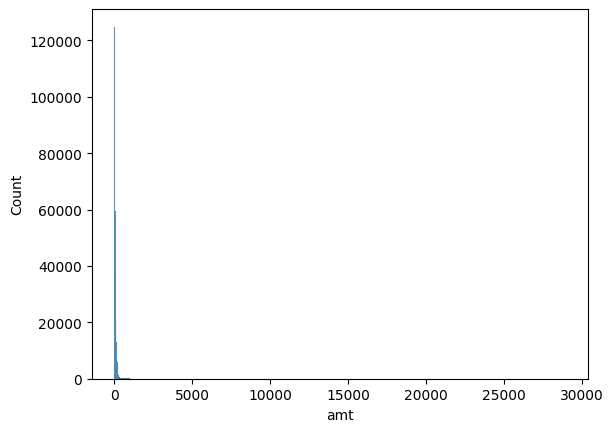

In [13]:
# check for outliers in the trasactions using histogram
sns.histplot(x=df['amt'])
plt.show()



In [14]:
# check the descriptive stat to be sure
print(df['amt'].describe())


count    339607.000000
mean         70.577984
std         161.675242
min           1.000000
25%           9.600000
50%          46.460000
75%          83.350000
max       28948.900000
Name: amt, dtype: float64


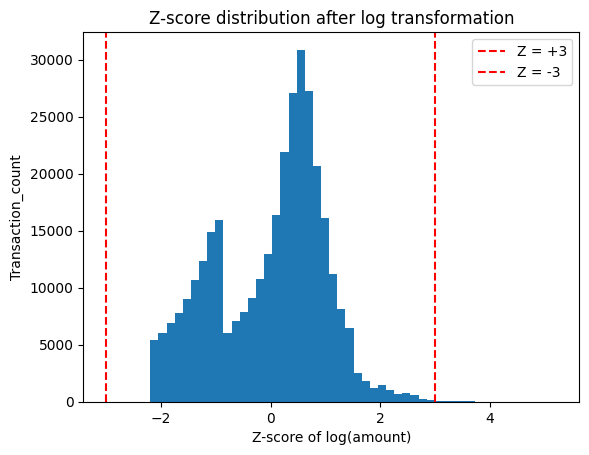

In [16]:
# transform the amount
def transform_amount(df):
  df['log_amt'] = np.log1p(df['amt'])
  df['z-score'] = (df['log_amt'] - df['log_amt'].mean()) / df['log_amt'].std()
  return df

df = transform_amount(df)
# plotting another histogram to check if the skewness has reduced
plt.hist(df['z-score'],bins = 50)
plt.title("Z-score distribution after log transformation")
plt.xlabel("Z-score of log(amount)")
plt.ylabel("Transaction_count")
plt.axvline(3, color = 'red', linestyle = "--", label = 'Z = +3')
plt.axvline(-3, color = 'red', linestyle = "--", label = 'Z = -3')
plt.legend()

plt.show()

In [17]:
# cast and bind the outliers
def bind_outliers(df):
  df['is_high_amt'] = (df['z-score'] > 3).astype(int)
  df['is_low_amt'] = (df['z-score'] < -3).astype(int)
  return df

df = bind_outliers(df)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 339607 entries, 2019-01-01 00:00:44 to 2020-12-31 23:59:24
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   merchant        339607 non-null  object 
 1   category        339607 non-null  object 
 2   amt             339607 non-null  float64
 3   city            339607 non-null  object 
 4   state           339607 non-null  object 
 5   lat             339607 non-null  float64
 6   long            339607 non-null  float64
 7   city_pop        339607 non-null  int64  
 8   job             339607 non-null  object 
 9   dob             339607 non-null  object 
 10  trans_num       339607 non-null  object 
 11  merch_lat       339607 non-null  float64
 12  merch_long      339607 non-null  float64
 13  is_fraud        339607 non-null  int64  
 14  fraud_category  339607 non-null  float64
 15  fraud_merchant  339607 non-null  float64
 16  log_amt         339607 non-nul

Feature engineering
To get meaninful features,i'll:
Extract the age of the clients from their date of birth
Extract the

In [19]:
# Extract the age
from datetime import date
# Extract the age of the clients from their date of birth
def age(df):
    df['dob'] = pd.to_datetime(df["dob"])
    today = date.today()
    df['age'] = df['dob'].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))
    return df

df = age(df)
print(df['age'].head())

trans_date_trans_time
2019-01-01 00:00:44    47
2019-01-01 00:00:51    63
2019-01-01 00:07:27    79
2019-01-01 00:09:03    58
2019-01-01 00:21:32    58
Name: age, dtype: int64


In [45]:
# Extract the hour,day and month of each transaction
def time_features(df):
  df.index = pd.to_datetime(df.index)
  df['day'] = df.index.day
  df['hour'] = df.index.hour
  df['month'] = df.index.month
  df['weekday'] = df.index.weekday

In [22]:
# Extract the distance between the merchant and the client using their latitude and longitude in km
def distance(row):
    merch_coords = (row['merch_lat'], row['merch_long'])
    client_coords = (row['lat'], row['long'])
    return geodesic(merch_coords, client_coords).km

df['distance'] = df.apply(distance, axis=1)
print(df['distance'].head())

trans_date_trans_time
2019-01-01 00:00:44     30.216618
2019-01-01 00:00:51    108.102912
2019-01-01 00:07:27     25.120545
2019-01-01 00:09:03     66.155859
2019-01-01 00:21:32     88.802805
Name: distance, dtype: float64


In [24]:
# convert the boolean values into integer
def convert_bool(df):
  for col in df.columns:
    if df[col].dtype == 'bool':
      df[col] = df[col].astype(int)
  return df

df = convert_bool(df)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 339607 entries, 2019-01-01 00:00:44 to 2020-12-31 23:59:24
Data columns (total 27 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   merchant        339607 non-null  object        
 1   category        339607 non-null  object        
 2   amt             339607 non-null  float64       
 3   city            339607 non-null  object        
 4   state           339607 non-null  object        
 5   lat             339607 non-null  float64       
 6   long            339607 non-null  float64       
 7   city_pop        339607 non-null  int64         
 8   job             339607 non-null  object        
 9   dob             339607 non-null  datetime64[ns]
 10  trans_num       339607 non-null  object        
 11  merch_lat       339607 non-null  float64       
 12  merch_long      339607 non-null  float64       
 13  is_fraud        339607 non-null  int64         
 14  fr

In [25]:
# define the feature engineering class
from sklearn.base import BaseEstimator, TransformerMixin

class FeatureEngineering(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X = X.fraud_category()
        X = X.fraud_merchant()
        X = X.transform_amount()
        X = X.bind_outliers()
        X = X.age()
        X = X.time_features()
        X = X.distance()
        X = X.is_whole()
        X = X.convert_bool()
        return X

In [26]:
# define the x and y features
# Removed 'monthly_30_amt_x' and 'monthly_30_amt_y' as they are not in the DataFrame columns
X = df[['fraud_category', 'fraud_merchant', 'log_amt', 'z-score',
       'is_high_amt', 'is_low_amt', 'age', 'day', 'hour', 'month', 'weekday',
       'distance', 'is_whole']]
y = df['is_fraud']

print(X.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 339607 entries, 2019-01-01 00:00:44 to 2020-12-31 23:59:24
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fraud_category  339607 non-null  float64
 1   fraud_merchant  339607 non-null  float64
 2   log_amt         339607 non-null  float64
 3   z-score         339607 non-null  float64
 4   is_high_amt     339607 non-null  int64  
 5   is_low_amt      339607 non-null  int64  
 6   age             339607 non-null  int64  
 7   day             339607 non-null  int32  
 8   hour            339607 non-null  int32  
 9   month           339607 non-null  int32  
 10  weekday         339607 non-null  int32  
 11  distance        339607 non-null  float64
 12  is_whole        339607 non-null  int64  
dtypes: float64(5), int32(4), int64(4)
memory usage: 31.1 MB
None


`Algorithm: Randomforest classifier because it can capture non linearity and tends to not overfit.`
`I'll check for imbalance and apply SMOTE to tackle class imbalance if there is any`
`If there is any problem with the fitting, i'll use grid search cv for hyperparameter tuning`



In [ ]:
# check for class imbalance
print(df['is_fraud'].value_counts())

In [52]:
# instantiate the model
model = XGBClassifier(tree_method = "gpu_hist", predictor = "gpu_predictor", use_label_encoder = False, eval_metric = 'logloss', random_state = 50)
param_grid = {
    'model__n_estimators': randint(100,300),
    'model__max_depth': randint(3,10),
    'model__learning_rate': uniform(0.01,0.3),
    'model__subsample': uniform(0.01,0.3),
    'model__colsample_bytree': uniform(0.7, 0.3),
    'model__gamma': uniform(0,0.4)
}


# split the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7, stratify=y)

# Find the minimum number of samples in any class in y_train
from collections import Counter
min_class_count = min(Counter(y_train).values())

# Set k_neighbors to be at most min_class_count - 1 (minimum allowed by SMOTE)
k_neighbors = min(5, min_class_count - 1) if min_class_count > 1 else 1

smote = SMOTE(k_neighbors=k_neighbors, random_state = 7)

model = XGBClassifier(tree_method = "gpu_hist", predictor = "gpu_predictor", use_label_encoder = False, eval_metric = 'logloss', random_state = 50)
pipeline = Pipeline([
    ('smote', smote),
    ('model', XGBClassifier(tree_method = "gpu_hist", predictor = "gpu_predictor", use_label_encoder = False, eval_metric = 'logloss', random_state = 50))
])

search_model = RandomizedSearchCV(
    estimator = pipeline,
    param_distributions = param_grid,
    n_iter = 20,
    cv=5,
    n_jobs=-1,
    scoring = 'f1',
    verbose = 1,
    random_state = 7
)

search_model.fit(X_train, y_train)

search_params = search_model.best_params_
best_score = search_model.best_score_
print("Best parameters:", search_params)
print("Best score:", best_score)

y_pred = search_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:18:19] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:18:19] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters: {'model__colsample_bytree': np.float64(0.9251229577306104), 'model__gamma': np.float64(0.2676052963535655), 'model__learning_rate': np.float64(0.1503258579234942), 'model__max_depth': 9, 'model__n_estimators': 259, 'model__subsample': np.float64(0.15722976672732114)}
Best score: 0.7651170437711262
[[101177    171]
 [   107    428]]


/usr/local/lib/python3.12/dist-packages/xgboost/core.py:2676: UserWarning: [03:18:20] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.shape) != 1 and self.num_features() != data.shape[1]:


In [53]:
print(confusion_matrix(y_test, y_pred))

[[101177    171]
 [   107    428]]


In [58]:
# check the metrics
from sklearn.metrics import roc_auc_score

proba = search_model.predict_proba(X_test)
# Use the probabilities for the positive class (usually column 1)
print(roc_auc_score(y_test, proba[:, 1]))

# y_proba
y_proba = search_model.predict_proba(X_test)[:,1]
print(y_proba)

# giving low threshold to y proba because recall is priortized over precision
for t in [0.5,0.4,0.3,0.25]:
  y_pred = (y_proba>t).astype(int)
  print(classification_report(y_test,y_pred))
#print(classification_report(y_test,y_pred) )





0.992740585874376
[1.7918706e-05 7.4684605e-05 4.3841606e-05 ... 2.4552486e-04 1.5928084e-04
 1.2917614e-06]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101348
           1       0.71      0.80      0.75       535

    accuracy                           1.00    101883
   macro avg       0.86      0.90      0.88    101883
weighted avg       1.00      1.00      1.00    101883

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101348
           1       0.66      0.81      0.73       535

    accuracy                           1.00    101883
   macro avg       0.83      0.91      0.86    101883
weighted avg       1.00      1.00      1.00    101883

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    101348
           1       0.59      0.83      0.69       535

    accuracy                           1.00    101883
   macro avg       

In [56]:
# save the model
import joblib
joblib.dump(search_model, 'model_xgb_corr.pkl')

['model_xgb_corr.pkl']

In [57]:
# download the model
from google.colab import files
files.download('model_xgb_corr.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>